In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score
from sklearn.naive_bayes import GaussianNB

In [2]:
iris = load_iris()

In [3]:
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])

In [4]:
x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [5]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


array([[<Axes: title={'center': 'target'}>]], dtype=object)

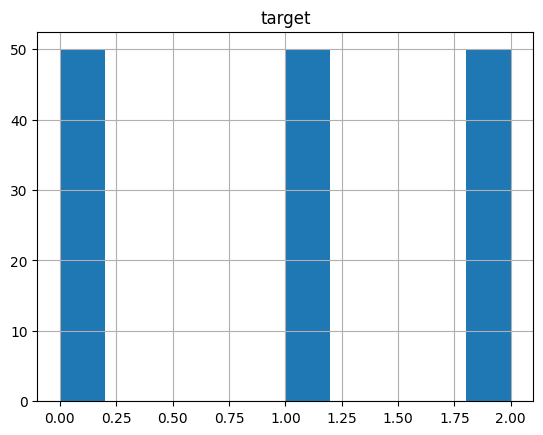

In [6]:
y.hist()

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

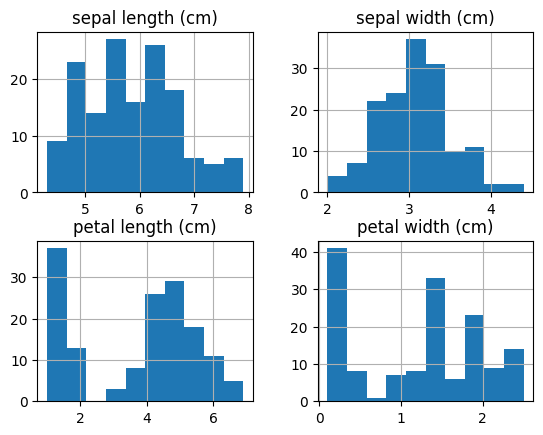

In [7]:
x.hist()

In [8]:
scaler = StandardScaler()
x = scaler.fit_transform(x.values)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y.values, train_size = 0.75, test_size =0.25,random_state=1)

In [10]:
model = GaussianNB()

In [11]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [12]:
y_pred = model.predict(x_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [14]:
tp = cm[0, 0]
fp = cm[1:, 0].sum()
fn = cm[0, 1:].sum()
tn = cm[1:, 1:].sum()
print("True Positive (TP):", tp)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("True Negative (TN):", tn)

True Positive (TP): 13
False Positive (FP): 0
False Negative (FN): 0
True Negative (TN): 25


In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

In [16]:
cmd = ConfusionMatrixDisplay(cm)

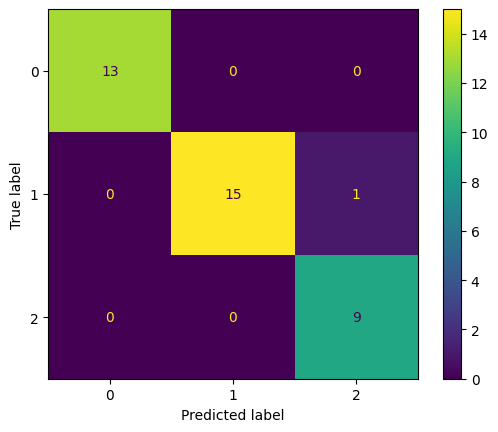

In [17]:
cmd.plot()

In [18]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [19]:
print(accuracy_score(y_test, y_pred))

0.9736842105263158


In [20]:
print(precision_score(y_test,y_pred, average = 'macro'))

0.9666666666666667


In [21]:
a = np.array([[6.4, 3.1, 5.5, 1.8]])

In [22]:
a

array([[6.4, 3.1, 5.5, 1.8]])

In [23]:
x1 = scaler.fit_transform(a)

In [24]:
print(x1)

[[0. 0. 0. 0.]]


In [25]:
y1_pred = model.predict(x1)

In [26]:
y1_pred

array([1])

In [27]:
x3 = a

In [28]:
x2 = scaler.fit(x_train)
x3 = x2.transform(x3)
print(x3)

[[6.35310909 3.30236038 5.43977243 1.76596029]]


In [29]:
y2_pred = model.predict(x3)

In [30]:
y2_pred

array([2])